<a href="https://colab.research.google.com/github/JCoronelUSF/PythonDataAnalytics/blob/main/JCoronel_PythonDataAnalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Step 1

#Dataset: This dataset provides some general data about over 800 different movies. The dataset includes information such as the runtime of a movie, the gross profit,
#The IMDB rating, the year it came out, amongst other variables.

#I found this dataset through Kaggle, the dataset was chosen because it contains multiple numeric and continuous variables that could be used to predict the IMDB rating of a movie
#through linear regression. The dataset also contains a fair amount of rows which is helpful to provide a good prediction model. Additionally, I wanted to select a dataset that was 
#both interesting to me and applicable to a real life scenario.

#Problem: I want to analyze the impact of certain movie variables when predicting the IMDB rating of a movie. This is a Regression Problem since I am analyzing the relationships of 
#multiple variables and how they help predict the continuous value of a target variable: IMDB Rating

#Import modules needed to perform linear regression
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Import movie dataset
df_movie = pd.read_csv(r'/content/moviedata.csv')
print(df_movie)


                                title  year  runtime (min)  \
0                             The Kid  1921             68   
1                        Sherlock Jr.  1924             45   
2                       The Gold Rush  1925             95   
3                Bronenosets Potemkin  1925             75   
4                         The General  1926             67   
..                                ...   ...            ...   
825                      The Irishman  2019            209   
826                      Little Women  2019            135   
827                       Toy Story 4  2019            100   
828  Once Upon a Time... in Hollywood  2019            161   
829          The Peanut Butter Falcon  2019             97   

                            genre  imdbRating              director  \
0           Comedy, Drama, Family         8.3       Charles Chaplin   
1         Action, Comedy, Romance         8.2         Buster Keaton   
2        Adventure, Comedy, Drama         

In [ ]:
#Return basic statistics and descriptive information about the data
print(df_movie.shape)
print(df_movie.describe())

#Check if the data contains any null values
print(df_movie.isnull().sum())

(830, 8)
              year  runtime (min)  imdbRating     imdbVotes   grossProfit
count   830.000000     830.000000  830.000000  8.300000e+02  8.300000e+02
mean   1993.918072     124.059036    7.947349  3.153053e+05  6.790728e+07
std      21.147778      27.512473    0.283118  3.438478e+05  1.097546e+08
min    1921.000000      45.000000    7.600000  2.508800e+04  1.305000e+03
25%    1984.000000     104.000000    7.700000  7.140450e+04  3.245338e+06
50%    2000.000000     120.000000    7.900000  1.858500e+05  2.345744e+07
75%    2010.000000     138.000000    8.100000  4.465445e+05  8.010324e+07
max    2019.000000     242.000000    9.300000  2.343110e+06  9.366622e+08
title            0
year             0
runtime (min)    0
genre            0
imdbRating       0
director         0
imdbVotes        0
grossProfit      0
dtype: int64


In [ ]:
#Step 2

#I chose Linear Regression as my model because it allows me to effectively evaluate the relationships between the independent variables and the response variable. 
#It is also worth noting, that all of the variables I used for this analysis are continuous and numeric, which are the types of variables most apropriate for linear regression
#Additionally, I wanted to predict the continuous value of IMDB rating using other variables, which again, is achieved through linear regression.

X = df_movie[['year', 'runtime (min)', 'imdbVotes', 'grossProfit']] #Features
y = df_movie['imdbRating'] #Response

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)

In [ ]:
#Step 3

#Perform linear regression on the training data
reg = LinearRegression() 
  
reg.fit(X_train, y_train) 

#Return the regression coefficients for each of the independent variables in relation to the dependent variable
print('The regression coefficients are: ',reg.coef_) 

#2 of the independent variables present a positive coefficient in relation to Gross Profit, meaning that Gross Profit is expected to increase as these independent variables increase
#On the other hand, the coefficients for year and gross profit are negative, therefore, IMDB Rating is expected to be lower when these two variables increase
    
#Return the y-intercept
print('The y-intercept is: ', reg.intercept_)

The regression coefficients are:  [-3.70707990e-03  1.89657924e-03  6.05706131e-07 -8.11025152e-10]
The y-intercept is:  14.963861611280105


In [ ]:
#Set y_pred as the prediction of IMDB Rating and then return the MSE and the MAE on the prediction to evaluate the accuracy
y_pred = reg.predict(X_test)

print('The mean squared error is: ',np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 
print('The mean absolute error is: ',np.sqrt(metrics.mean_absolute_error(y_test, y_pred)))

#The MSE is 0.21 (rounded), and the MAE is 0.47. The closer to 0 the better

The mean squared error is:  0.20712491006528425
The mean absolute error is:  0.40639012926132784


In [ ]:
#Return the accuracy score of the prediction model
print('The accuracy score is: ', reg.score(X_test,y_test))

#The accuracy score is 55%, I will create other models to evaluate the performance of this model in specific

The accuracy score is:  0.546930163475567


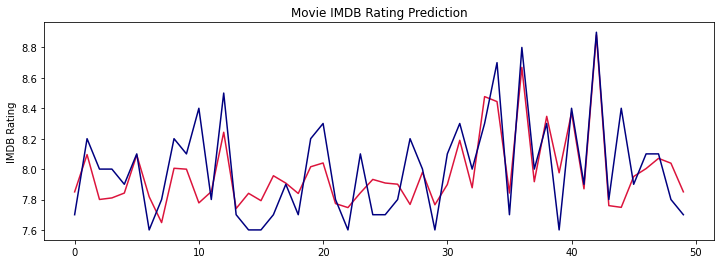

In [ ]:
#Set X as a range of instances up to 50
x = np.arange(50)

#Plot both the test Gross Profit data and the predicted Gross Profit to compare and evaluate our predictions
plt.rcParams["figure.figsize"] = (12,4)
plt.plot(x, y_pred[:50], c = "crimson")
plt.plot(x, y_test[:50], c = "navy")

plt.title('Movie IMDB Rating Prediction')
plt.ylabel('IMDB Rating')
plt.show()

#The line graph below shows a comparison between 50 different predicted values for the dependent variable against 
#50 different values from the test portion of the dependent variable of the dataset. The X-axis is made up of a range of 50 iterations.

In [ ]:
#Create another model exluding the gross profit variable to compare against the original model

X2 = df_movie[['year', 'runtime (min)', 'imdbVotes']]
y2 = df_movie['imdbRating'] 

X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.20, random_state=123)

reg2 = LinearRegression() 
  
reg2.fit(X_train, y_train) 

print('The regression coefficients are: ',reg2.coef_)

print('The y-intercept is: ', reg2.intercept_)

#This model seems to be fairly similar to the first one

The regression coefficients are:  [-4.15107371e-03  1.76964455e-03  4.69375216e-07]
The y-intercept is:  15.854559688259727


In [ ]:
y_pred2 = reg2.predict(X_test)

print('The mean squared error is: ',np.sqrt(metrics.mean_squared_error(y_test, y_pred2))) 
print('The accuracy score is: ',reg2.score(X_test,y_test))

#No significant differences found

The mean squared error is:  0.21504771030166647
The accuracy score is:  0.5116062140821135


In [ ]:
#Create another model exluding the imdbVotes variable to compare against the original model

X3 = df_movie[['runtime (min)', 'grossProfit', 'year']]
y3 = df_movie['imdbRating'] 

X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.20, random_state=123)

reg3 = LinearRegression() 
  
reg3.fit(X_train, y_train) 

print('The regression coefficients are: ',reg3.coef_)

print('The y-intercept is: ',reg3.intercept_)

#The overall correlation in this model seems to be stronger than in the original model

The regression coefficients are:  [ 2.34132497e-03  2.37249555e-10 -2.88559252e-03]
The y-intercept is:  13.388760314150321


In [ ]:
y_pred3 = reg3.predict(X_test)

print('The mean squared error is: ',np.sqrt(metrics.mean_squared_error(y_test, y_pred3))) 
print('The accuracy score is: ',reg3.score(X_test,y_test))

#The MSE remains fairly similar. The accuraccy score however, is very low at only 13% so this model might be a better predictor than the original

The mean squared error is:  0.28622342268810247
The accuracy score is:  0.1348113262081171


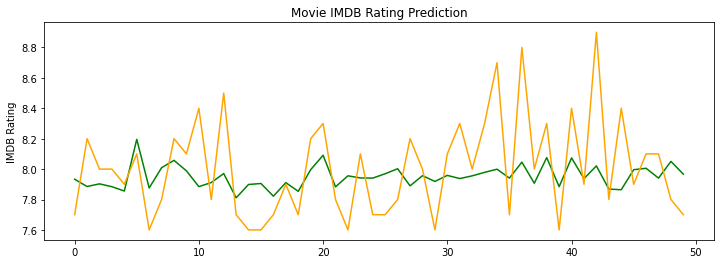

In [ ]:
x = np.arange(50)

plt.rcParams["figure.figsize"] = (12,4)
plt.plot(x, y_pred3[:50], c = "green")
plt.plot(x, y_test[:50], c = "orange")

plt.title('Movie IMDB Rating Prediction')
plt.ylabel('IMDB Rating')
plt.show()

#I graphed the third model to further evaluate its performance, however, the predictions do not seem to align closely with the test data.
#Therefore, this is not a better predictor than the first prediction model created

In [ ]:
#Step 4

#The first prediction model evaluated seems to be the best when it comes to predicting the IMDB Rating of a movie based off the independent variables indicated above.
#The coefficients and line graphs do indicate some degree of correlation and relationship between the independent variables and the dependent variable, in addition to that,
#metrics such as the MSE, MAE, and Accuracy score show that this first model seems fairly accurate. Lastly, it is worth noting that the predictions align very closely with the test data
#Therefore, it can be concluded that this model is fairly accurate to make predictions on the IMDB rating of a movie based off the independent variables noted.



